In [25]:
import pandas as pd
data = pd.read_csv("bank.csv",delimiter=";",header='infer')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


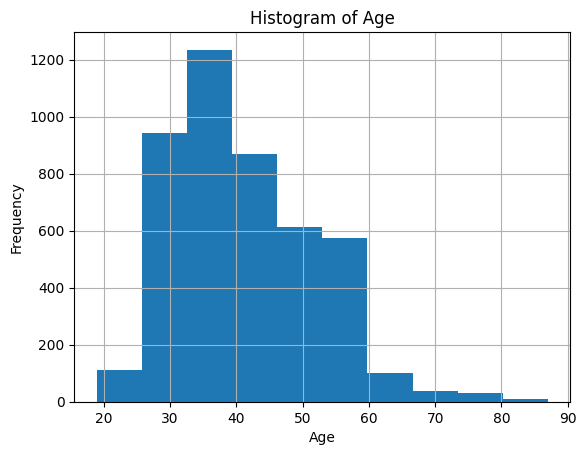

In [26]:
import matplotlib.pyplot as plt
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [27]:
final = data.drop(['job','marital','education','default','housing','contact','day','month','duration','campaign','pdays','previous','poutcome'],axis=1)
final.head()

,age,balance,loan,y
0,30,1787,no,no
1,33,4789,yes,no
2,35,1350,no,no
3,30,1476,yes,no
4,59,0,no,no


In [28]:
final.y.replace(('yes','no'),(1,0),inplace=True)
final.loan.replace(('yes','no'),(1,0),inplace=True)
final.head()

C:\Users\617816\AppData\Local\Temp\1\ipykernel_852\3141869049.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final.y.replace(('yes','no'),(1,0),inplace=True)
C:\Users\617816\AppData\Local\Temp\1\ipykernel_852\3141869049.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final.y.replace(('yes',

,age,balance,loan,y
0,30,1787,0,0
1,33,4789,1,0
2,35,1350,0,0
3,30,1476,1,0
4,59,0,0,0


In [29]:
x = final.drop(['y'],axis=1)
y = final.drop(['age','balance','loan'],axis=1)
x.head()

,age,balance,loan
0,30,1787,0
1,33,4789,1
2,35,1350,0
3,30,1476,1
4,59,0,0


In [30]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.004811197115836996

In [33]:
lr.coef_

array([[ 9.09010659e-04,  3.47935373e-07, -6.76620418e-02]])

In [34]:
from sklearn import tree
dt1 = tree.DecisionTreeClassifier()
dt1.fit(x_train,y_train)
dt1.score(x_test,y_test)

0.8044198895027624

In [35]:
dt2 = tree.DecisionTreeClassifier(max_depth=4)
dt2.fit(x_train,y_train)
dt2.score(x_test,y_test)

0.8928176795580111